In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access dataset
dataset_path = '/content/drive/MyDrive/Plant disease detection  Dataset.zip'

Mounted at /content/drive


In [ ]:
import zipfile

# Open the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    # List contents of the zip file
    zip_contents = zip_ref.namelist()

    # Print the contents
    for item in zip_contents:
        print(item)

Plant disease detection  Dataset/.DS_Store
Plant disease detection  Dataset/Diseased/
Plant disease detection  Dataset/Diseased/.DS_Store
Plant disease detection  Dataset/Diseased/1011.JPG.jpeg
Plant disease detection  Dataset/Diseased/1012.JPG.jpeg
Plant disease detection  Dataset/Diseased/1013.JPG.jpeg
Plant disease detection  Dataset/Diseased/1016.JPG.jpeg
Plant disease detection  Dataset/Diseased/1017.JPG.jpeg
Plant disease detection  Dataset/Diseased/1019.JPG.jpeg
Plant disease detection  Dataset/Diseased/1021.JPG.jpeg
Plant disease detection  Dataset/Diseased/1022.JPG.jpeg
Plant disease detection  Dataset/Diseased/1025.JPG.jpeg
Plant disease detection  Dataset/Diseased/1027.JPG.jpeg
Plant disease detection  Dataset/Diseased/1028.JPG.jpeg
Plant disease detection  Dataset/Diseased/1029.JPG.jpeg
Plant disease detection  Dataset/Diseased/1030.JPG.jpeg
Plant disease detection  Dataset/Diseased/1031.JPG.jpeg
Plant disease detection  Dataset/Diseased/1033.JPG.jpeg
Plant disease detectio

In [ ]:
from google.colab import drive
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


# Unzip the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Define paths
base_dir = '/content/Plant disease detection Dataset'
diseased_dir = os.path.join(base_dir, '/content/Plant disease detection  Dataset/Diseased')
healthy_dir = os.path.join(base_dir, '/content/Plant disease detection  Dataset/Healthy')

# Check if directories exist and are not empty
if not os.path.exists(diseased_dir) or not os.listdir(diseased_dir):
    raise FileNotFoundError(f"No files found in {diseased_dir}")
if not os.path.exists(healthy_dir) or not os.listdir(healthy_dir):
    raise FileNotFoundError(f"No files found in {healthy_dir}")

# Create directories for train and validation sets
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir)
print(validation_dir)

os.makedirs(os.path.join(train_dir, 'Diseased'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Healthy'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'Diseased'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'Healthy'), exist_ok=True)

# Get list of files
diseased_files = os.listdir(diseased_dir)
healthy_files = os.listdir(healthy_dir)

# Split the data
train_diseased, val_diseased = train_test_split(diseased_files, test_size=0.2, random_state=42)
train_healthy, val_healthy = train_test_split(healthy_files, test_size=0.2, random_state=42)

# Move files to train and validation directories
for file in train_diseased:
    shutil.move(os.path.join(diseased_dir, file), os.path.join(train_dir, 'Diseased', file))

for file in val_diseased:
    shutil.move(os.path.join(diseased_dir, file), os.path.join(validation_dir, 'Diseased', file))

for file in train_healthy:
    shutil.move(os.path.join(healthy_dir, file), os.path.join(train_dir, 'Healthy', file))

for file in val_healthy:
    shutil.move(os.path.join(healthy_dir, file), os.path.join(validation_dir, 'Healthy', file))

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')


/content/Plant disease detection Dataset/train
/content/Plant disease detection Dataset/validation
Found 327 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [ ]:
#Preprocess Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset
train_dir = '/content/Plant disease detection Dataset/train'
validation_dir = '/content/Plant disease detection Dataset/validation'

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 327 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


Epoch 1/25
16/16 [==============================] - 27s 1s/step - loss: 0.3964 - accuracy: 0.8860 - val_loss: 0.3826 - val_accuracy: 0.8750
Epoch 2/25
16/16 [==============================] - 20s 1s/step - loss: 0.3444 - accuracy: 0.8925 - val_loss: 0.3858 - val_accuracy: 0.8750
Epoch 3/25
16/16 [==============================] - 21s 1s/step - loss: 0.3649 - accuracy: 0.8893 - val_loss: 0.3771 - val_accuracy: 0.8750
Epoch 4/25
16/16 [==============================] - 22s 1s/step - loss: 0.3625 - accuracy: 0.8925 - val_loss: 0.3783 - val_accuracy: 0.8750
Epoch 5/25
16/16 [==============================] - 19s 1s/step - loss: 0.3992 - accuracy: 0.8827 - val_loss: 0.3574 - val_accuracy: 0.8875
Epoch 6/25
16/16 [==============================] - 19s 1s/step - loss: 0.3558 - accuracy: 0.8860 - val_loss: 0.3520 - val_accuracy: 0.8875
Epoch 7/25
16/16 [==============================] - 20s 1s/step - loss: 0.3447 - accuracy: 0.8990 - val_loss: 0.3796 - val_accuracy: 0.8750
Epoch 8/25
16/16 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 2s 293ms/step
Accuracy: 87.95%
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[73  0]
 [10  0]]
1/1 [==============================] - 2s 2s/step


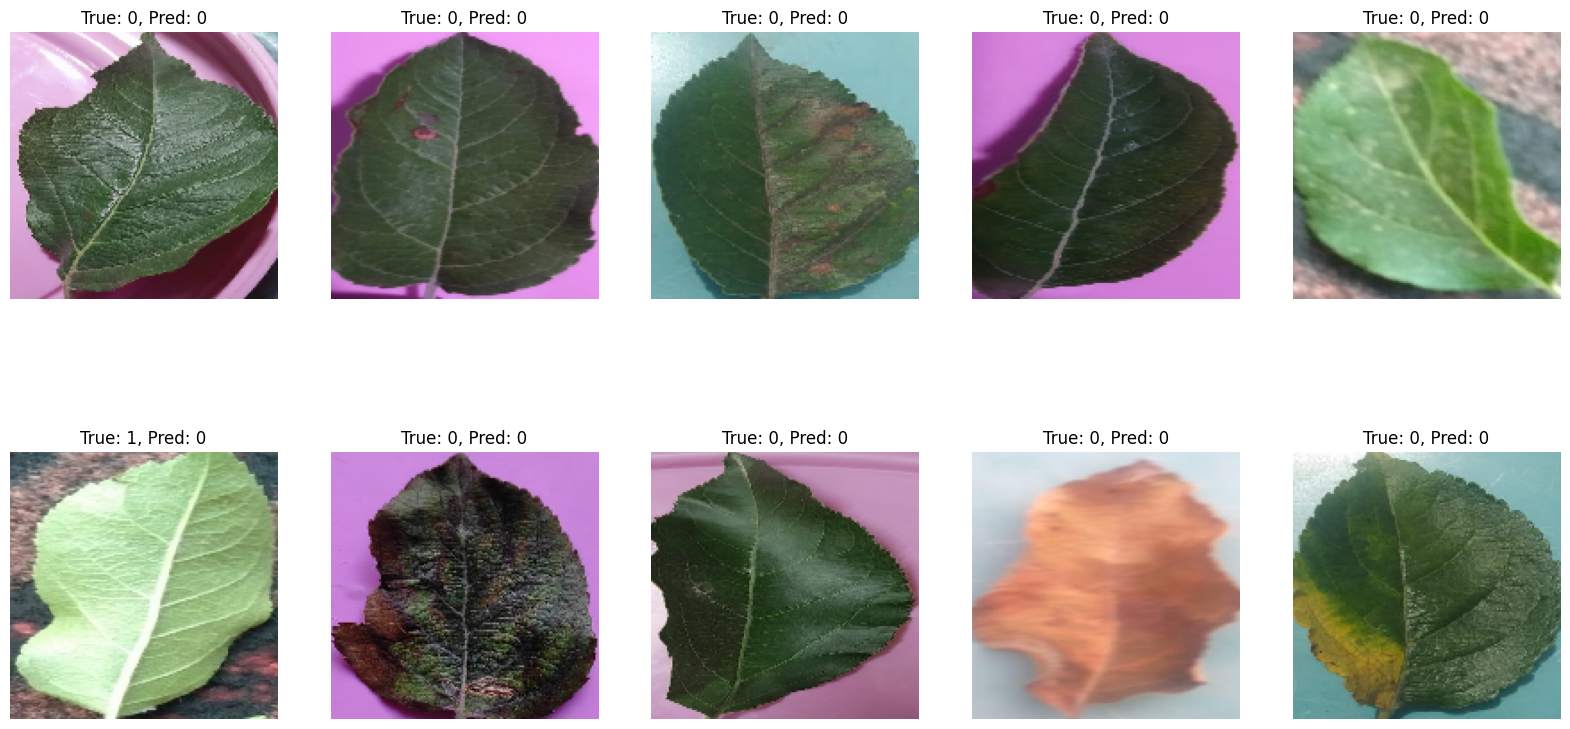

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the RNN model
def create_rnn_model(input_shape):
    model = models.Sequential()

    # CNN layers for feature extraction
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flattening the CNN output
    model.add(layers.Flatten())

    # Adding Dense layer to reshape the output for RNN input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Reshape((-1, 128)))  # Reshape to (sequence_length, feature_dim)

    # Adding RNN layers
    model.add(layers.GRU(128, return_sequences=True))
    model.add(layers.GRU(128))

    # Dense layers for classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Input shape
input_shape = (150, 150, 3)
model = create_rnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')

# Save the model
model.save('plant_disease_rnn_model.h5')

# Get predictions
predictions = model.predict(validation_generator)
predicted_classes = np.round(predictions).astype(int)

# Get true labels
true_classes = validation_generator.classes

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, zero_division=1)
recall = recall_score(true_classes, predicted_classes, zero_division=1)
f1 = f1_score(true_classes, predicted_classes, zero_division=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot a sample of photos with their predictions
def plot_samples(generator, model, num_samples=10):
    # Get a batch of validation data
    x_batch, y_batch = next(generator)

    # Make predictions
    predictions = model.predict(x_batch)
    predicted_classes = np.round(predictions).astype(int)

    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f'True: {int(y_batch[i])}, Pred: {predicted_classes[i][0]}')
        plt.axis('off')
    plt.show()

plot_samples(validation_generator, model)
